# Chapter 5 Computing transformations with matrices

## 5.1 Representing linear transformations with matrices

### 5.1.1 Writing vectors and linear transformations as matrices

In [1]:
B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

In [2]:
list(zip(*B))

[(0, 0, 1), (2, 1, 0), (1, 0, -1)]

**Note:** this linear combination function is from the exercise in section 4.2.5

In [3]:
from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)

In [4]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

In [5]:
multiply_matrix_vector(B,v)

(1, -2, -2)

### 5.1.3 Composing linear transformations by matrix multiplication

### 5.1.4 Implementing matrix multiplication

In [6]:

from vectors import *

def matrix_multiply(a,b):
    return tuple(
        tuple(dot(row,col) for col in zip(*b))
        for row in a
    )

In [7]:
a = ((1,1,0),(1,0,1),(1,-1,1))

In [8]:
b = ((0,2,1),(0,1,0),(1,0,-1))

In [9]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [10]:
c = ((1,2),(3,4))

In [11]:
d = ((0,-1),(1,0))

In [12]:
matrix_multiply(c,d)

((2, -1), (4, -3))

### 5.1.5 3D animation with matrix transformations

In [13]:
from math import sin,cos
def get_rotation_matrix(t): #1
    seconds = t/1000 #2
    return (
        (cos(seconds),0,-sin(seconds)),
        (0,1,0),
        (sin(seconds),0,cos(seconds))
    )

In [14]:
!python animate_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


## 5.1.6 Exercises

**Exercise:** Write a function `infer_matrix(n, transformation)` that takes a dimension (like 2 or 3) and a function that is a vector transformation assumed to be linear. It should return an $n$-by-$n$ square matrix (an $n$-tuple of $n$-tuples of numbers, which is the matrix representing the linear transformation. Of course, the output will only be meaningful if the input transformation is linear. Otherwise, it is meaningless!

In [15]:
def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple(1 if i==j else 0 for j in range(1,n+1)) #1
    standard_basis = [standard_basis_vector(i) for i in range(1,n+1)] #2
    cols = [transformation(v) for v in standard_basis] #3
    return tuple(zip(*cols)) #4

In [16]:
from transforms import rotate_z_by

In [17]:
from math import pi

In [18]:
infer_matrix(3,rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

**Mini-project:** Write a random_matrix function that generates matrices of a specified size with random whole number entries. Use the function to generate five pairs of 3-by-3 matrices. Multiply each of the pairs together by hand (for practice), and then check your work with the matrix_multiply function.

In [19]:
from random import randint
def random_matrix(rows,cols,min=-2,max=2):
    return tuple(
        tuple(
        randint(min,max) for j in range(0,cols))
        for i in range(0,rows)
    )

In [20]:
random_matrix(3,3,0,10)

((4, 10, 6), (8, 1, 4), (5, 2, 6))

**Exercise:** Apply the matrix `((2,1,1), (1,2,1), (1,1,2))` to all the vectors defining the teapot. What happens to the teapot and why?

In [21]:
!python matrix_transform_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


**Exercise:** Implement `multiply_matrix_vector` in a different way by using two nested comprehensions: one traversing the rows of the matrix and one traversing the entries of each row.

In [22]:
def multiply_matrix_vector(matrix,vector):
    return tuple(
        sum(vector_entry * matrix_entry
            for vector_entry, matrix_entry in zip(row,vector))
        for row in matrix
    )

In [23]:
multiply_matrix_vector(b,v) #should be same as before

(1, -2, -2)

**Exercise:** Implement `multiply_matrix_vector` yet another way using the fact that the output coordinates are the dot products of the input matrix rows with the input vector.

In [24]:
def multiply_matrix_vector(matrix,vector):
    return tuple(
        dot(row,vector)
        for row in matrix
    )

In [25]:
multiply_matrix_vector(b,v) #should be same as before

(1, -2, -2)

**Exercise:** Once again let’s use the two matrices $$A = \left(\begin{array}{ccc}1&1&0\\1&0&1\\1&-1&1\end{array}\right) \quad \text{and} \quad B = \left(\begin{array}{ccc}0&2&1\\0&1&0\\1&0&-1\end{array}\right)$$

from section 5.1.3.  Write a function `compose_a_b` that executes the composition of the linear transformation for $A$ and the linear transformation for $B$. Then use the `infer_matrix` function from a previous exercise in this section to show that `infer_matrix(3, compose_a_b)` is the same as the matrix product $AB$.

In [26]:
from transforms import compose
a = ((1,1,0),(1,0,1),(1,-1,1))
b = ((0,2,1),(0,1,0),(1,0,-1))

In [27]:
def transform_a(v):
    return multiply_matrix_vector(a,v)

def transform_b(v):
    return multiply_matrix_vector(b,v)

compose_a_b = compose(transform_a, transform_b)

In [28]:
infer_matrix(3,compose_a_b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [29]:
matrix_multiply(a,b) #same result!

((0, 3, 1), (1, 2, 0), (1, 1, 0))

**Exercise:** We can multiply a square matrix by itself any number of times. We can then think of successive matrix multiplications as “raising a matrix to a power.” For a square matrix $A$, $A \cdot A$ can be written $A^2$; $A \cdot A \cdot A$ can be written $A^3$; and so on. Write a `matrix_power(power,matrix)` function that raises a matrix to the specified (whole number) power.

In [30]:
def matrix_power(power,matrix):
    result = matrix
    for _ in range(1,power):
        result = matrix_multiply(result,matrix)
    return result

for example:

In [31]:
matrix_multiply(b,matrix_multiply(b,b)) # B * B * B

((-1, 4, 2), (0, 1, 0), (2, 0, -3))

In [32]:
matrix_power(3,b) #same result!

((-1, 4, 2), (0, 1, 0), (2, 0, -3))

## 5.2 Interpreting matrices of different shapes 

In [33]:
a = ((-1, 0, -1, -2, -2), (0, 0, 2, -2, 1), (-2, -1, -2, 0, 1), (0, 2, -2, -1, 0), (1, 1, -1, -1, 0))

In [34]:
b = ((-1, 0, -1, -2, -2), (0, 0, 2, -2, 1), (-2, -1, -2, 0, 1), (0, 2, -2, -1, 0), (1, 1, -1, -1, 0))

In [35]:
matrix_multiply(a,b)

((1, -5, 9, 6, 1),
 (-3, -5, -1, 1, 2),
 (7, 3, 3, 5, 1),
 (4, 0, 10, -3, 0),
 (1, -1, 5, -3, -2))

### 5.2.1 Column vectors as matrices

In [36]:
c = ((-1, -1, 0), (-2, 1, 2), (1, 0, -1))

In [37]:
d = ((1,),(1,),(1,))

In [38]:
matrix_multiply(c,d)

((-2,), (1,), (0,))

In [39]:
multiply_matrix_vector(c,(1,1,1))

(-2, 1, 0)

### 5.2.2 What pairs of matrices can be multiplied?

### 5.2.3 Viewing square and non-square matrices as vector functions

### 5.2.4 Projection as a linear map from 3D to 2D

### 5.2.5 Composing linear maps

### 5.2.6 Exercises

**Exercise:** Write a function that turns a column vector into a row vector, or vice versa. Flipping a matrix on its side like this is called `transposition` and the resulting matrix is called the `transpose` of the original.

In [40]:
def transpose(matrix):
    return tuple(zip(*matrix))

In [41]:
transpose(((1,),(2,),(3,)))

((1, 2, 3),)

In [42]:
transpose(((1, 2, 3),))

((1,), (2,), (3,))

**Exercise:** Show by example that the `infer_matrix` function from a previous exercise can create matrices for linear functions whose inputs and outputs have different dimensions.

In [43]:
def project_xy(v):
    x,y,z = v
    return (x,y)

In [44]:
infer_matrix(3,project_xy)

((1, 0, 0), (0, 1, 0))

## 5.3.1 Making plane translations linear

In [45]:
from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

<Figure size 600x507.692 with 1 Axes>

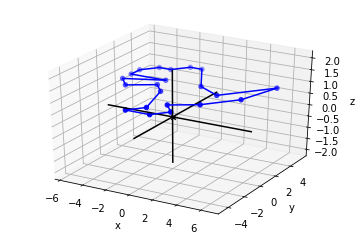

In [46]:
from draw3d import draw3d, Points3D, Segment3D

def polygon_segments_3d(points,color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0,count)]

dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

In [47]:
magic_matrix = (
    (1,0,3),
    (0,1,1),
    (0,0,1))

In [48]:
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

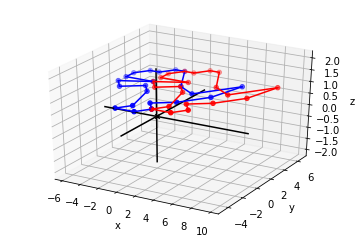

In [49]:
draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d,color='blue'),
    Points3D(*translated,color='red'),
    *polygon_segments_3d(translated,color='red')
)

In [50]:
translated_2d = [(x,y) for (x,y,z) in translated]

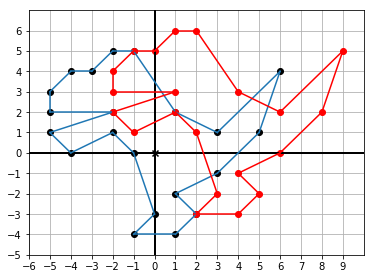

In [51]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated_2d, color='red'),
    Polygon(*translated_2d, color='red')
)

## 5.3.2 Finding a 3D matrix for a 2D translation

In [52]:
rotate_and_translate = ((0,-1,3),(1,0,1),(0,0,1))
rotated_translated_dino = [
    multiply_matrix_vector(rotate_and_translate, v) 
    for v in dino_3d]

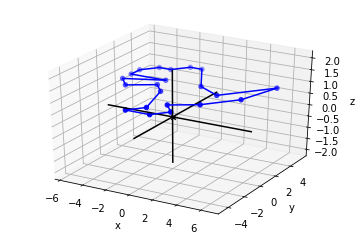

In [53]:
draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

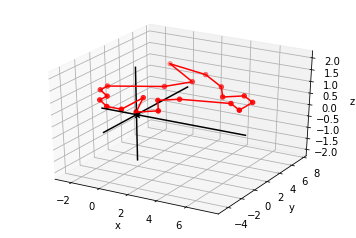

In [54]:
draw3d(
    Points3D(*rotated_translated_dino, color='red'),
    *polygon_segments_3d(rotated_translated_dino, color='red')
)

## 5.3.4 Translating 3D objects in a 4D world

In [55]:
def translate_3d(translation):
    def new_function(target): #1
        a,b,c = translation
        x,y,z = target
        matrix = ((1,0,0,a),(0,1,0,b),(0,0,1,c),(0,0,0,1)) #2
        vector = (x,y,z,1)
        x_out, y_out, z_out, _ = multiply_matrix_vector(matrix,vector) #3
        return (x_out,y_out,z_out)
    return new_function

In [56]:
!python matrix_translate_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


### 5.3.5 Exercises

**Exercise:** Show that the 3D ‘magic’ matrix transformation does not work if you move a 2D figure, such as the dinosaur we have been using, to the plane $z = 2$. What happens instead?

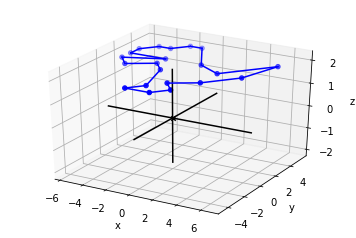

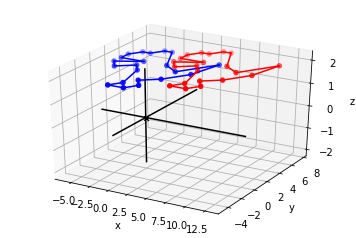

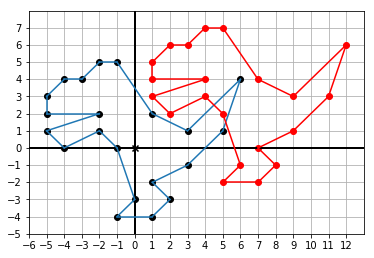

In [57]:
# Same code as above except for the 2 in this line
dino_3d = [(x,y,2) for x,y in dino_vectors]
######################

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d,color='blue'),
    Points3D(*translated,color='red'),
    *polygon_segments_3d(translated,color='red')
)

translated_2d = [(x,y) for (x,y,z) in translated]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated_2d, color='red'),
    Polygon(*translated_2d, color='red')
)

**Exercise:** Come up with a matrix to translate the dinosaur by -2 units in the $x$ direction and -2 units in the $y$ direction. Execute the transformation and show the result.

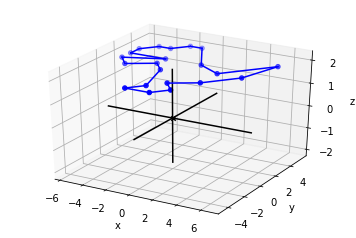

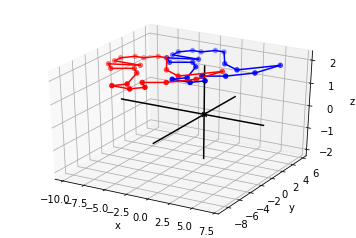

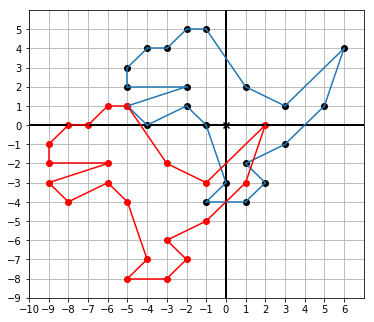

In [58]:
# Same code as above, except we define a new matrix
translation_matrix = ((1,0,-2),(0,1,-2),(0,0,1))
######################

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

translated = [multiply_matrix_vector(translation_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d,color='blue'),
    Points3D(*translated,color='red'),
    *polygon_segments_3d(translated,color='red')
)

translated_2d = [(x,y) for (x,y,z) in translated]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated_2d, color='red'),
    Polygon(*translated_2d, color='red')
)

**Mini-project:** Find a 3x3 matrix that rotates a 2D figure in the plane $z = 1$ by $45^\circ$, decreases its size by a factor of 2, and translates it by the vector (2,2). Demonstrate that it works by applying it to the vertices of the dinosaur.

In [59]:
from vectors import rotate2d
from transforms import curry2
from math import pi

rotate_45_degrees = curry2(rotate2d)(pi/4)
rotation_matrix = infer_matrix(2,rotate_45_degrees)
rotation_matrix

((0.7071067811865476, -0.7071067811865475),
 (0.7071067811865476, 0.7071067811865476))

In [60]:
scale_matrix = ((0.5,0),(0,0.5))
rotate_and_scale = matrix_multiply(scale_matrix,rotation_matrix)
rotate_and_scale

((0.3535533905932738, -0.35355339059327373),
 (0.3535533905932738, 0.3535533905932738))

In [61]:
((a,b),(c,d)) = rotate_and_scale
final_matrix = ((a,b,2),(c,d,2),(0,0,1))
final_matrix

((0.3535533905932738, -0.35355339059327373, 2),
 (0.3535533905932738, 0.3535533905932738, 2),
 (0, 0, 1))

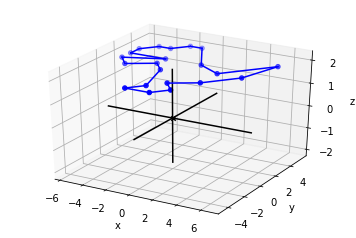

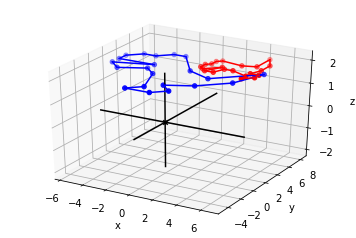

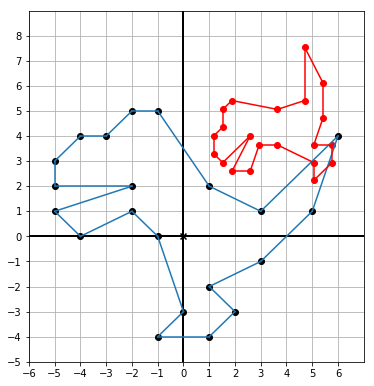

In [62]:
# Same code as above, except we use "final matrix"


draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)


# use final_matrix here
translated = [multiply_matrix_vector(final_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d,color='blue'),
    Points3D(*translated,color='red'),
    *polygon_segments_3d(translated,color='red')
)

translated_2d = [(x,y) for (x,y,z) in translated]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated_2d, color='red'),
    Polygon(*translated_2d, color='red')
)

**Exercise:** Write a function analogous to `translate_3d` called `translate_4d` that uses a 5x5 matrix to translate a 4D vector by another 4D vector. Run an example to show that the coordinates are translated.

In [63]:
def translate_4d(translation):
    def new_function(target):
        a,b,c,d = translation
        x,y,z,w = target
        matrix = (
            (1,0,0,0,a),
            (0,1,0,0,b),
            (0,0,1,0,c),
            (0,0,0,1,d),
            (0,0,0,0,1))
        vector = (x,y,z,w,1)
        x_out,y_out,z_out,w_out,_ = multiply_matrix_vector(matrix,vector)
        return (x_out,y_out,z_out,w_out)
    return new_function

In [64]:
translate_4d((1,2,3,4))((10,20,30,40))

(11, 22, 33, 44)